In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [12]:
ds = pd.read_csv('Advertising.csv', index_col=0)
ds

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [13]:
# display the first 10 rows
ds.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [14]:
# display the first 10 rows
ds.tail(10)

,TV,radio,newspaper,sales
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6.0,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42.0,3.6,19.6
195,149.7,35.6,6.0,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [15]:
ds.shape

(200, 4)

In [16]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


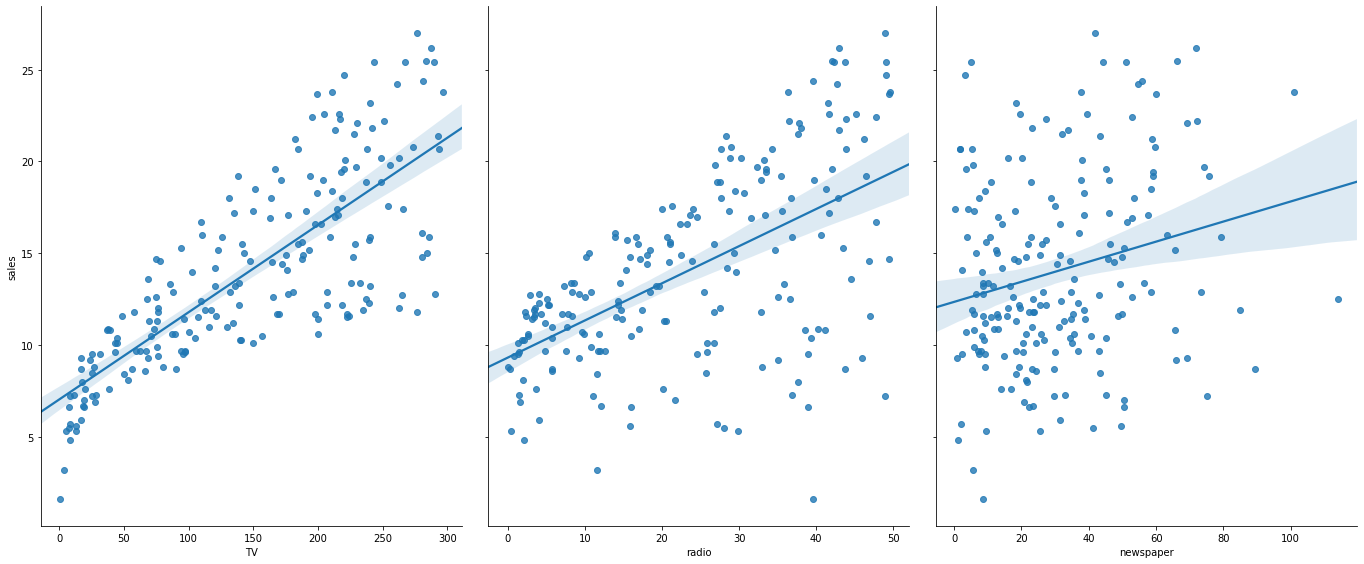

In [17]:
# Visualising Data
sns.pairplot(ds, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=8, aspect=0.8, kind='reg')

In [18]:
feature_cols = ['TV', 'radio', 'newspaper']

In [19]:
x = ds[feature_cols]

In [21]:
x = ds[['TV', 'radio', 'newspaper']]
x.head(10)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2


In [22]:
# check the type and shape of X
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [23]:
# select a Series from the DataFrame
y = ds['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = ds.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [24]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [25]:
# Splitting X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [26]:
# Linear regression in scikit-learn
linreg = LinearRegression()

In [27]:
# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Interpreting model coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [29]:
# we use python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [30]:
#Making predictions
y_pred = linreg.predict(x_test)

In [31]:
# Model evaluation metrics for regression
true = [100, 50, 30, 20]
pred = [110, 60, 40, 10]

In [32]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

10.0


In [33]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


In [34]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 20**2) / 4)

print(metrics.mean_squared_error(true, pred))

225.0
100.0


In [35]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 20**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

15.0
10.0


In [36]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


In [37]:
# Let's remove the newspaper to check quality of prediction from the model and check the RMSE!
feature_cols = ['TV', 'radio']
x = ds[feature_cols]
y = ds.sales
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

# compute the RMSE of predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


In [41]:
from sklearn.externals import joblib
joblib.dump(linreg,'rf_regressor.pkl')

['rf_regressor.pkl']

In [42]:
# To load the model from pickle file
linreg1 = joblib.load('rf_regressor.pkl')

In [43]:
linreg1.predict(x_test)

array([21.73751851, 16.40451622,  7.64073276, 17.81512707, 18.6140367 ,
       23.75320401, 16.26267467, 13.30968011,  9.11623605, 17.24121988,
       14.37997584,  9.86630093, 17.28107008, 16.70455883, 14.93571851,
       15.47067849, 12.39847009, 17.21737409, 11.18626133, 18.09114847,
        9.34543641, 12.71804909,  8.75327159, 10.468843  , 11.34116649,
       14.98646893,  9.77329331, 19.43186663, 18.31005062, 17.14215851,
       21.62609193, 14.47149683, 16.3536012 , 12.27215653, 19.97488243,
       15.34878155, 13.90760851,  9.99030388, 20.98440888,  7.482353  ,
        3.61019982,  7.1944428 ,  5.99097416, 18.39958364,  8.35858094,
       14.12195436, 15.05074527, 20.38304162, 20.65191677, 19.47457534])